In [1]:
library(tidyverse)
library(RCurl)
library(tidymodels)
library(dplyr)
library(purrr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infe

In [2]:
# Read Data from a Github Repo where we put our data.csv file downloaded from Kaggle
url = "https://raw.githubusercontent.com/Zane-Z/DSCI-100-Group-Project/main/data.csv"
data = read_csv(url)
head(data)

Parsed with column specification:
cols(
  CRIM = col_double(),
  ZN = col_double(),
  INDUS = col_double(),
  CHAS = col_double(),
  NOX = col_double(),
  RM = col_double(),
  AGE = col_double(),
  DIS = col_double(),
  RAD = col_double(),
  TAX = col_double(),
  PTRATIO = col_double(),
  B = col_double(),
  LSTAT = col_double(),
  MEDV = col_double()
)



CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
set.seed(2000)
data_split <- initial_split(data, prop = 0.75, strata = CRIM)
data_training <- training(data_split)
data_testing <- testing(data_split)

data <- na.omit(data)

apply(data, 2, function(x) any(is.na(x)))

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
  FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
PTRATIO       B   LSTAT    MEDV 
  FALSE   FALSE   FALSE   FALSE

In [4]:
funs <- c(mean = mean, median = median, std = sd)
args <- list(na.rm = TRUE)
data_analysis <- data_training %>%
            select(CRIM, TAX, PTRATIO, B) %>%
              map_df(~ funs %>%
               map(exec, .x, !!!args), .id = "var")
data_analysis

summary(data_training)

var,mean,median,std
<chr>,<dbl>,<dbl>,<dbl>
CRIM,3.583873,0.26266,8.601609
TAX,407.966146,334.50000,166.984830
PTRATIO,18.419271,18.95000,2.278161
B,355.572005,390.81500,90.374056


      CRIM                ZN             INDUS             CHAS        
 Min.   : 0.00906   Min.   :  0.00   Min.   : 0.740   Min.   :0.00000  
 1st Qu.: 0.08238   1st Qu.:  0.00   1st Qu.: 5.190   1st Qu.:0.00000  
 Median : 0.26266   Median :  0.00   Median : 9.795   Median :0.00000  
 Mean   : 3.58387   Mean   : 10.88   Mean   :11.211   Mean   :0.07031  
 3rd Qu.: 3.59493   3rd Qu.: 12.50   3rd Qu.:18.100   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.740   Max.   :1.00000  
                                                                       
      NOX               RM             AGE              DIS        
 Min.   :0.3890   Min.   :3.561   Min.   :  2.90   Min.   : 1.137  
 1st Qu.:0.4530   1st Qu.:5.876   1st Qu.: 42.17   1st Qu.: 2.085  
 Median :0.5380   Median :6.208   Median : 77.95   Median : 2.939  
 Mean   :0.5578   Mean   :6.269   Mean   : 68.27   Mean   : 3.741  
 3rd Qu.:0.6240   3rd Qu.:6.617   3rd Qu.: 94.33   3rd Qu.: 5.213  
 Max.   :0.8710 

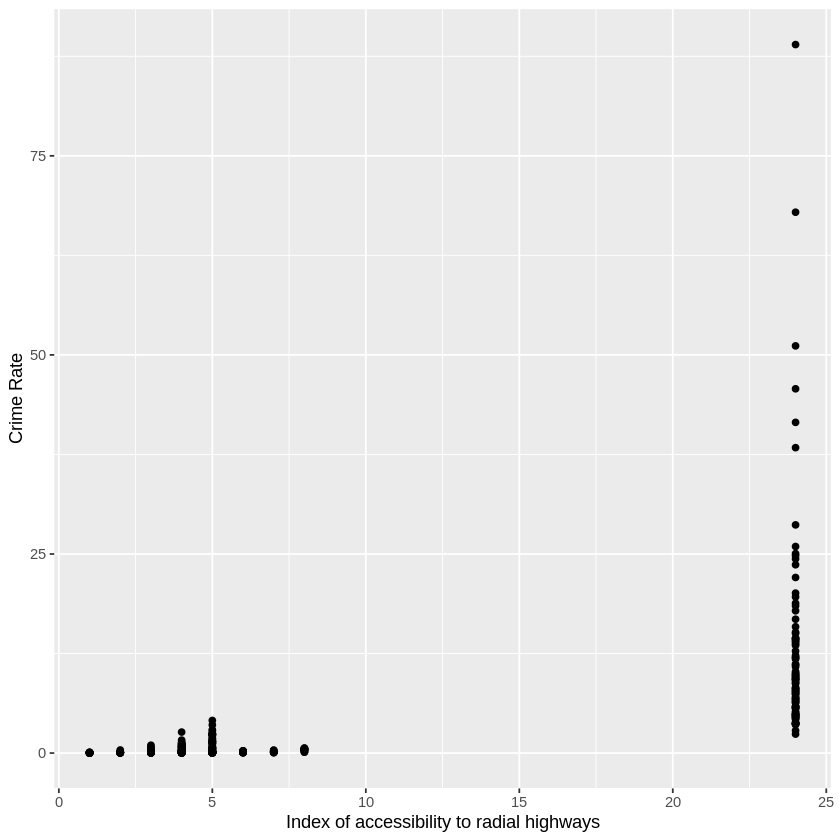

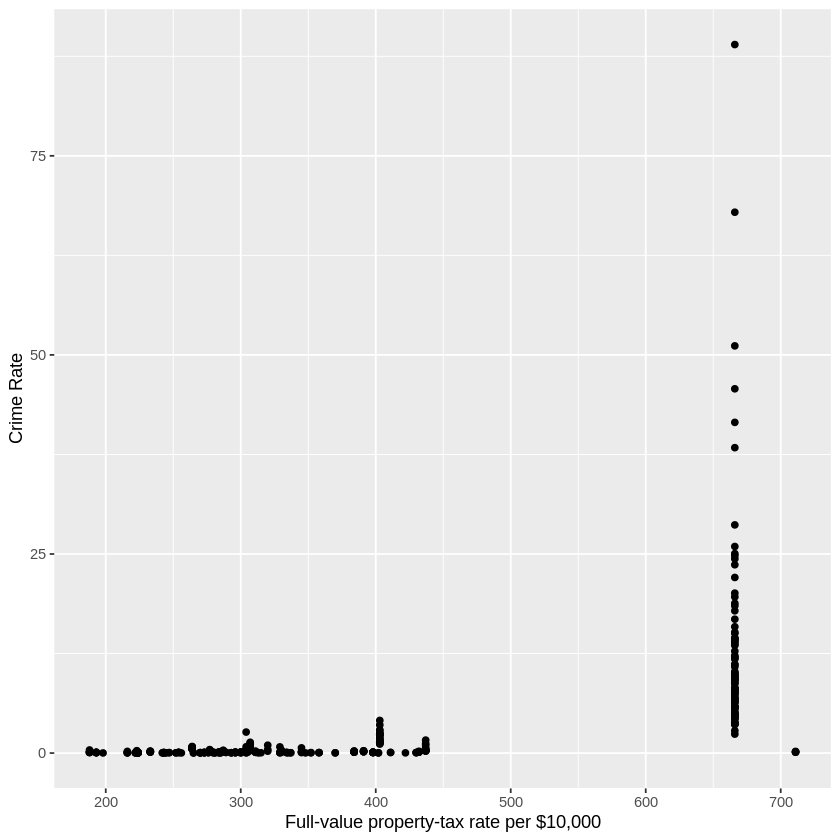

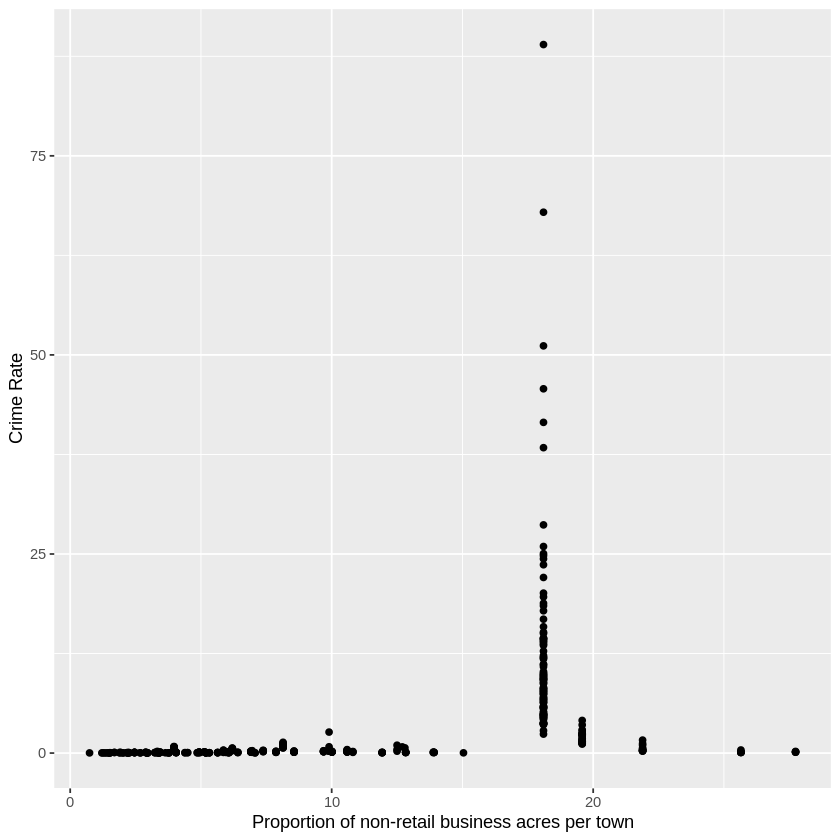

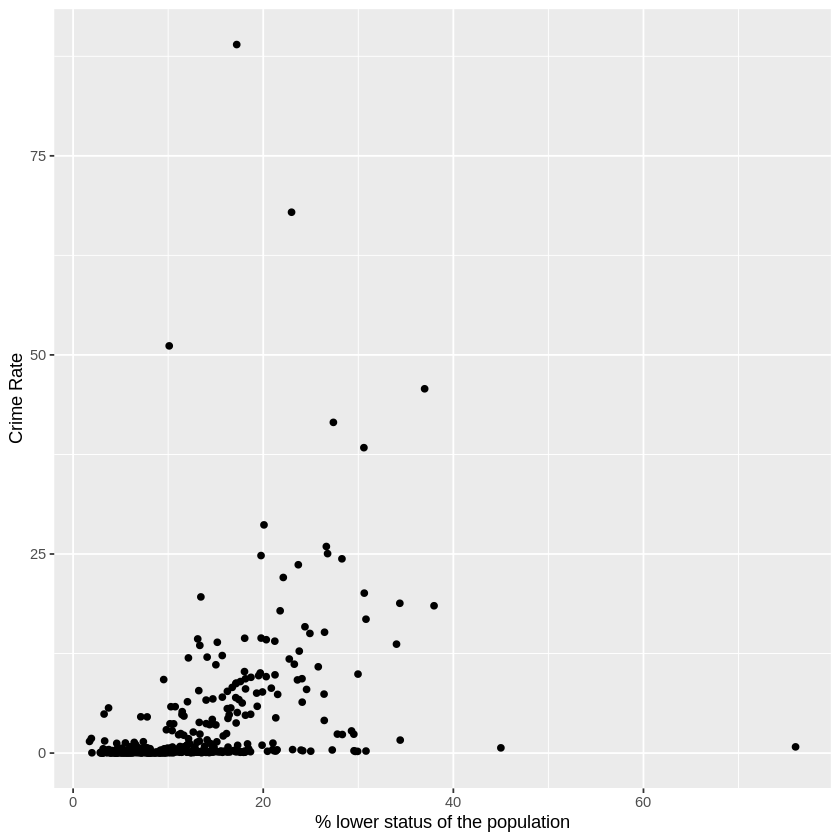

In [5]:
plot_rad <- ggplot(data_training, aes(x = RAD, y = CRIM)) +
  geom_point() + 
  xlab("Index of accessibility to radial highways") +
  ylab("Crime Rate")

plot_tax <- ggplot(data_training, aes(x = TAX, y = CRIM)) +
  geom_point() + 
  xlab("Full-value property-tax rate per $10,000") +
  ylab("Crime Rate")

plot_indus <- ggplot(data_training, aes(x = INDUS, y = CRIM)) +
  geom_point() + 
  xlab("Proportion of non-retail business acres per town") +
  ylab("Crime Rate")

plot_lstat <- ggplot(data_training, aes(x = LSTAT, y = CRIM)) +
  geom_point() + 
  xlab("% lower status of the population") +
  ylab("Crime Rate")

plot_rad
plot_tax
plot_indus
plot_lstat

In [6]:
# options(repr.plot.width=25, repr.plot.width=25)
# ggpairs(data_training)